In [64]:
import math
import sys
import os
from scipy.optimize import linprog
import numpy as np
# import random
import matplotlib.pyplot as plt


In [65]:
def plot_price_curve(price_curve: list):
    import matplotlib.pyplot as plt

    plt.step(range(24), price_curve)
    plt.xlabel("Hour")
    plt.xticks(range(24), [f"{i}:00" for i in range(24)], rotation=45)
    plt.ylabel("NOK per kWh")
    plt.title("Generated price curve for a day")
    plt.ylim(0)
    plt.show()


def plot_price_curve_vs_usage(price_curve: list, usage: list) -> None:
    """Plot the price curve and the usage curve in the same graph

    Args:
        price_curve: list of float, the price curve in NOK per kWh
        usage: list of float, the usage in kWh for each hour. Example: [(10, 5.5)] for 5.5 kWh at 10:00am

    Returns:
        None
    """

    # plotting the optimal power usage against the price curve
    plt.step(range(24), price_curve, label="Price curve (NOK/kWh)")
    plt.step(range(24), usage, label="Optimal power usage (kWh)")
    plt.xlabel("Hour")
    # xticks are the hours of the day formatted hour
    plt.xticks(range(24), [f"{i}:00" for i in range(24)], rotation=45)

    plt.title("Optimal power usage vs. price curve")
    plt.legend()
    # make sure legend is not overlapping with the graph
    plt.tight_layout()
    plt.show()


# Question 1


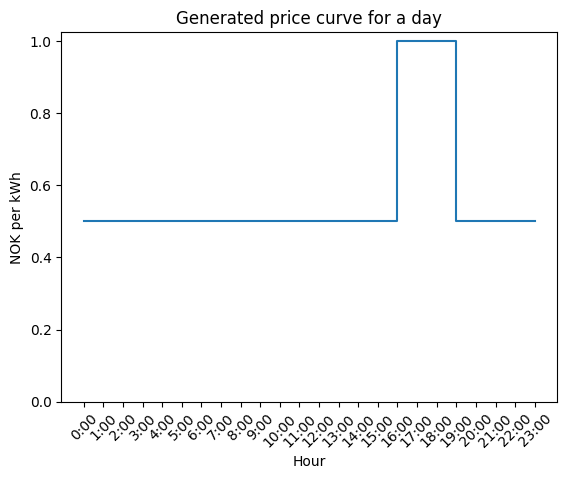

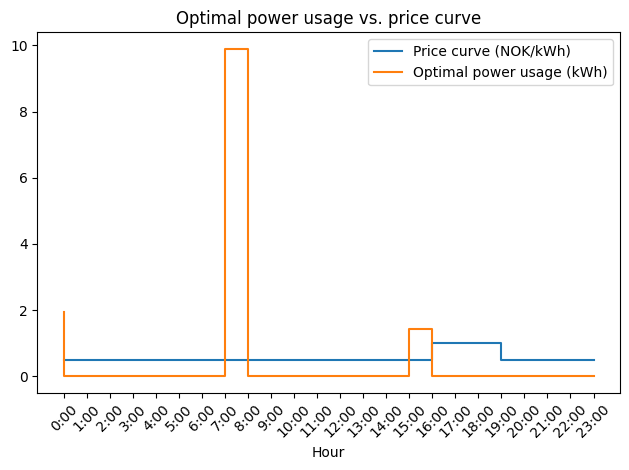

Optimal power usage for each hour:
Hour 0: 1.94 kWh
Hour 1: 0.00 kWh
Hour 2: 0.00 kWh
Hour 3: 0.00 kWh
Hour 4: 0.00 kWh
Hour 5: 0.00 kWh
Hour 6: 0.00 kWh
Hour 7: 0.00 kWh
Hour 8: 9.90 kWh
Hour 9: 0.00 kWh
Hour 10: 0.00 kWh
Hour 11: 0.00 kWh
Hour 12: 0.00 kWh
Hour 13: 0.00 kWh
Hour 14: 0.00 kWh
Hour 15: 0.00 kWh
Hour 16: 1.44 kWh
Hour 17: 0.00 kWh
Hour 18: 0.00 kWh
Hour 19: 0.00 kWh
Hour 20: 0.00 kWh
Hour 21: 0.00 kWh
Hour 22: 0.00 kWh
Hour 23: 0.00 kWh
Total cost: 6.64 dollars


In [102]:
# Constants
peak_cost = 1  # dollars per kWh during peak hours
non_peak_cost = 0.5  # dollars per kWh during non-peak hours
peak_hours = range(17, 20)  # Peak hours from 5:00pm to 8:00pm

# Power requirements for each applicant (in kWh)
power_requirements = [1.94, 9.9, 1.44]  # Laundry machine  # EV charger  # Dishwasher

# Objective function coefficients (cost per kWh)
costs = [non_peak_cost if hour not in peak_hours else peak_cost for hour in range(24)]

# Construct the constraint matrix (each row represents an applicant's power usage)
A_eq = np.zeros((4, 24))  # 4 rows for each applicant and one for the total power usage
for i in range(3):
    A_eq[i, i * 8 : (i + 1) * 8] = (
        1  # Assign 1 to the corresponding hours for each applicant
    )
A_eq[3, :] = 1  # Total power usage constraint

# Define the right-hand side vector (power requirements)
b_eq = power_requirements + [
    sum(power_requirements)
]  # Power requirements for each applicant and total power requirement

# Solve the linear programming problem
result = linprog(costs, A_eq=A_eq, b_eq=b_eq)

# Extract the optimal power usage
optimal_usage = result.x

plot_price_curve(costs)
plot_price_curve_vs_usage(costs, optimal_usage)

# Print the optimal power usage and total cost
print("Optimal power usage for each hour:")
for hour, usage in enumerate(optimal_usage):
    print(f"Hour {hour}: {usage:.2f} kWh")
print("Total cost:", result.fun, "dollars")


In [67]:
print(A_eq)
print(b_eq)


[[1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[1.94, 9.9, 1.44, 13.28]


# Question 2


## Generating price curve (RTP)

In [87]:
def generate_price_curve_RTP(peak_hours: list) -> list:
    """Generate a random real-time price curve for a day

    Returns:
        list of float: the price curve in NOK per kWh
    """
    import random
    random.seed(6)
    price_curve = [
        random.uniform(1, 1.5) if i in peak_hours else random.uniform(0.6, 0.7)
        for i in range(24)
    ]

    return price_curve


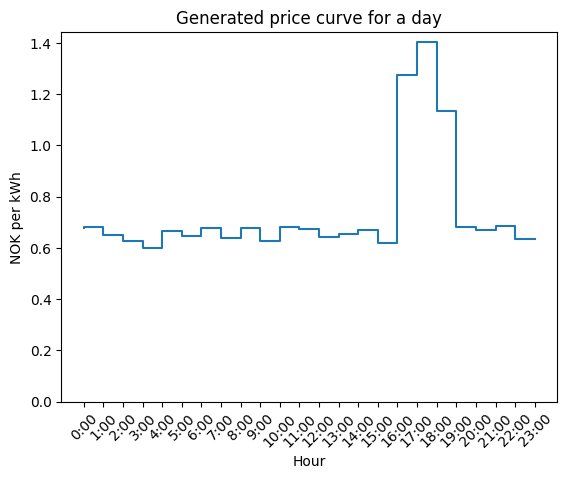

In [88]:

plot_price_curve(generate_price_curve_RTP(peak_hours))


## Appliances 

In [104]:
# Constants
peak_hours = range(17, 20)  # Peak hours from 5:00pm to 8:00pm
# Power requirements and time constraints for each appliance
appliances = [
    # non-shiftable loads
    {"power": 2, "hours": range(10, 20)},  # Lighting
    {"power": 9.6, "hours": range(0, 23)},  # Heating
    {"power": 1.32, "hours": range(0, 23)},  # Refrigerator
    {"power": 3.9, "hours": [8, 9, 11, 12, 17, 18],},  # Stove
    {"power": 0.6, "hours": range(17, 22)},  # TV
    {"power": 0.6, "hours": range(17, 22)},  # Computer
    {"power": 0.144, "hours": range(0, 23)},  # Router
    {"power": 0.84, "hours": range(0, 23)},  # Separate freezer
    {"power": 1.2, "hours": range(17, 18)},  # Microwave
    # shiftable loads
    {"power": 1.44, "hours": range(24)},  # Dishwasher
    {"power": 1.94, "hours": range(24)},  # Laundry machine
    {"power": 1.44, "hours": range(24)},  # Dryer
    {"power": 9.9, "hours": range(24)},  # EV
]

non_shiftable_appliances = appliances[:9]
shiftable_appliances = appliances[9:]



## Plotting code q2

The lowest price of the day is 0.6000451714885071 NOK/kWh at 4:00


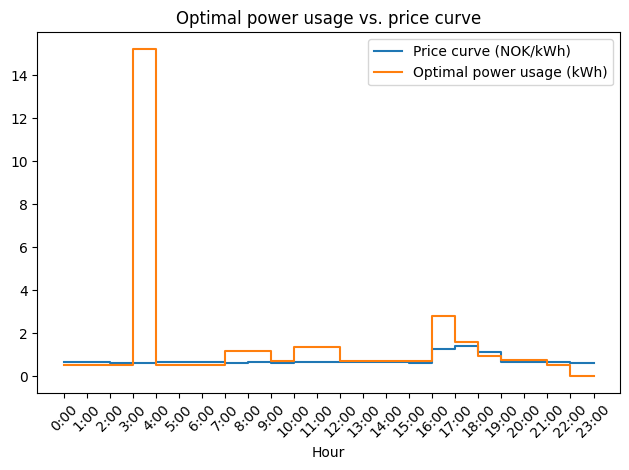

Optimal power usage for each hour:
Hour 0: 0.52 kWh
Hour 1: 0.52 kWh
Hour 2: 0.52 kWh
Hour 3: 0.52 kWh
Hour 4: 15.24 kWh
Hour 5: 0.52 kWh
Hour 6: 0.52 kWh
Hour 7: 0.52 kWh
Hour 8: 1.17 kWh
Hour 9: 1.17 kWh
Hour 10: 0.72 kWh
Hour 11: 1.37 kWh
Hour 12: 1.37 kWh
Hour 13: 0.72 kWh
Hour 14: 0.72 kWh
Hour 15: 0.72 kWh
Hour 16: 0.72 kWh
Hour 17: 2.81 kWh
Hour 18: 1.61 kWh
Hour 19: 0.96 kWh
Hour 20: 0.76 kWh
Hour 21: 0.76 kWh
Hour 22: 0.52 kWh
Hour 23: 0.00 kWh


In [97]:
# Get the lowest priced hour of the day
lowest_price = min(costs)
lowest_price_hour = costs.index(lowest_price)
print(
    f"The lowest price of the day is {lowest_price} NOK/kWh at {lowest_price_hour}:00"
)

optimal_usage = [0] * 24

shiftable_power_requirements = [appliance["power"] for appliance in shiftable_appliances]

# Distribute the power requirements for the shiftable appliances to the lowest price hour
optimal_usage[lowest_price_hour] = sum(shiftable_power_requirements)


# Distribute the power requirements to the non-shiftable applicants
for appliance in non_shiftable_appliances:
    for hour in appliance["hours"]:
        optimal_usage[hour] += appliance["power"] / len(appliance["hours"])


plot_price_curve_vs_usage(costs, optimal_usage)
print(f"Optimal power usage for each hour:")
for hour, usage in enumerate(optimal_usage):
    print(f"Hour {hour}: {usage:.2f} kWh")



## Optimization q2

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[1.94, 1.44, 9.9, 13.280000000000001]
Optimal power usage for each hour:
Hour 0: 0.00 kWh
Hour 1: 0.00 kWh
Hour 2: 0.00 kWh
Hour 3: 0.00 kWh
Hour 4: 13.28 kWh
Hour 5: 0.00 kWh
Hour 6: 0.00 kWh
Hour 7: 0.00 kWh
Hour 8: 0.00 kWh
Hour 9: 0.00 kWh
Hour 10: 0.20 kWh
Hour 11: 0.20 kWh
Hour 12: 0.20 kWh
Hour 13: 0.20 kWh
Hour 14:

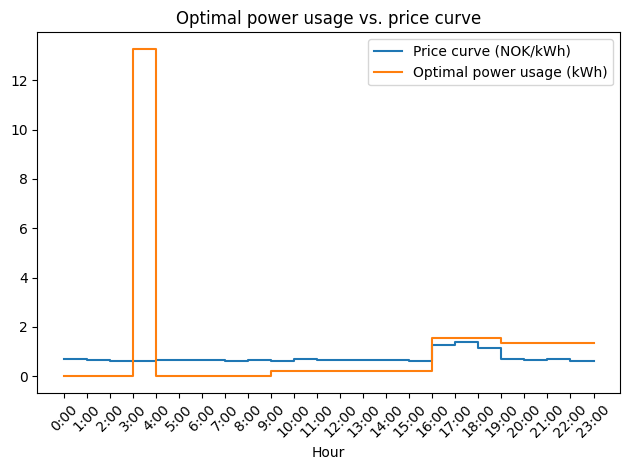

In [92]:
# Objective function coefficients (RTP kWh)
costs = generate_price_curve_RTP(peak_hours)

# Construct the constraint matrix (each row represents an hour)
A_eq = np.zeros(
    (len(non_shiftable_appliances), 24)
)  # 5 rows for each applicant and one for the total power usage
for i, applicant in enumerate(shiftable_applicants):
    for hour in applicant["hours"]:
        A_eq[i, hour] = 1  # Assign 1 to the corresponding hours for each applicant


# Define the right-hand side vector (power requirements)
power_requirements = [applicant["power"] for applicant in shiftable_applicants]

# add the sum of each coloumn to the last row of the A_eq matrix
A_eq[3, :] = sum(A_eq[0:3, :])


b_eq = power_requirements + [
    sum(power_requirements)
]  # Power requirements for each applicant and total power requirement


# # Solve the linear programming problem
# result = linprog(costs, A_eq=A_eq, b_eq=b_eq)

# # Extract the optimal power usage
# optimal_usage = result.x


print(A_eq)
# print(len(A_eq))
print(b_eq)
# print(len(b_eq))
# print(costs)
# print(optimal_usage)

# Print the optimal power usage and total cost
print("Optimal power usage for each hour:")
for hour, usage in enumerate(optimal_usage):
    print(f"Hour {hour}: {usage:.2f} kWh")
print("Total cost:", result.fun, "dollars")

plot_price_curve_vs_usage(costs, optimal_usage)


# Question 3


## Plotting code

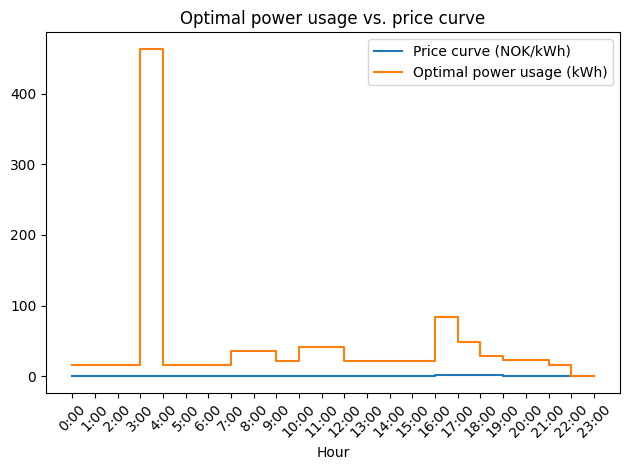

Optimal power usage for each hour:
Hour 0: 15.53 kWh
Hour 1: 15.53 kWh
Hour 2: 15.53 kWh
Hour 3: 15.53 kWh
Hour 4: 463.43 kWh
Hour 5: 15.53 kWh
Hour 6: 15.53 kWh
Hour 7: 15.53 kWh
Hour 8: 35.03 kWh
Hour 9: 35.03 kWh
Hour 10: 21.53 kWh
Hour 11: 41.03 kWh
Hour 12: 41.03 kWh
Hour 13: 21.53 kWh
Hour 14: 21.53 kWh
Hour 15: 21.53 kWh
Hour 16: 21.53 kWh
Hour 17: 84.23 kWh
Hour 18: 48.23 kWh
Hour 19: 28.73 kWh
Hour 20: 22.73 kWh
Hour 21: 22.73 kWh
Hour 22: 15.53 kWh
Hour 23: 0.00 kWh


In [99]:


optimal_usage = [0] * 24

# power_requirements for the shiftable applicants excluding EV
EV_power_requirement = shiftable_appliances[-1]["power"]
shiftable_power_requirements = [appliance["power"] for appliance in shiftable_appliances[:-1]]


# Distribute the power requirements to the lowest price hour
optimal_usage[lowest_price_hour] = (
    sum(power_requirements) * 30 + EV_power_requirement * 5
)


# Distribute the power requirements to the non-shiftable applicants
for appliance in non_shiftable_appliances:
    for hour in appliance["hours"]:
        optimal_usage[hour] += appliance["power"] / len(appliance["hours"]) * 30


plot_price_curve_vs_usage(costs, optimal_usage)
print(f"Optimal power usage for each hour:")
for hour, usage in enumerate(optimal_usage):
    print(f"Hour {hour}: {usage:.2f} kWh")



# Question 4


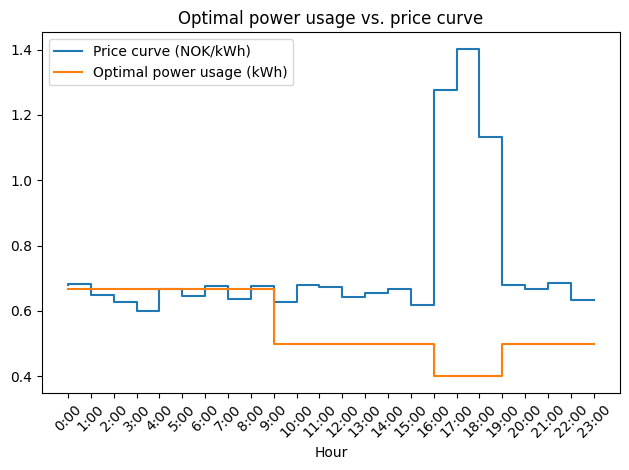

Optimal power usage for each hour:
Hour 0: 0.67 kWh
Hour 1: 0.67 kWh
Hour 2: 0.67 kWh
Hour 3: 0.67 kWh
Hour 4: 0.67 kWh
Hour 5: 0.67 kWh
Hour 6: 0.67 kWh
Hour 7: 0.67 kWh
Hour 8: 0.67 kWh
Hour 9: 0.67 kWh
Hour 10: 0.50 kWh
Hour 11: 0.50 kWh
Hour 12: 0.50 kWh
Hour 13: 0.50 kWh
Hour 14: 0.50 kWh
Hour 15: 0.50 kWh
Hour 16: 0.50 kWh
Hour 17: 0.40 kWh
Hour 18: 0.40 kWh
Hour 19: 0.40 kWh
Hour 20: 0.50 kWh
Hour 21: 0.50 kWh
Hour 22: 0.50 kWh
Hour 23: 0.50 kWh
Total cost: 9.499787738962 dollars


In [105]:
# Constants
total_power_limit = 2  # Maximum total power usage per hour


# Objective function coefficients (cost per kWh)
costs = generate_price_curve_RTP(peak_hours)

# Construct the constraint matrix (each row represents an hour)
A_eq = np.zeros((24, 24))
for hour in range(24):
    for applicant in applicants:
        if hour in applicant["hours"]:
            A_eq[hour, hour] += 1  # Increment power usage for the corresponding hour

# Define the right-hand side vector (power requirements)
b_eq = [total_power_limit] * 24  # Total power usage limit for each hour

# Solve the linear programming problem
result = linprog(costs, A_eq=A_eq, b_eq=b_eq)

# Extract the optimal power usage
optimal_usage = result.x

plot_price_curve_vs_usage(costs, optimal_usage)

# Print the optimal power usage and total cost
print("Optimal power usage for each hour:")
for hour, usage in enumerate(optimal_usage):
    print(f"Hour {hour}: {usage:.2f} kWh")
print("Total cost:", result.fun, "dollars")


In [78]:
print(A_eq)
print(b_eq)


[[3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.